In [1]:
import numpy as np
import cmath
from numpy.lib.scimath import sqrt as csqrt
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

%matplotlib inline

# Study of Transparent Boundary Conditions for the KdV equation

As presented by [Halpern, 1986] for the linearized Navier-Stokes equation, we will obtain here the expression for the Transparent Boundary Conditions for the linearized 1D KdV equation

\begin{equation}
\label{eq:kdv}
Lu = 0
\end{equation}


where

$$L = \frac{\partial}{\partial t} + a\frac{\partial}{\partial x} + \epsilon\frac{\partial}{\partial x^3}, \ \ a \in \mathbb{R}  $$

The coefficient $\epsilon>0$, based in the analysis scale made previously for the KdV equation, was introduced such that we have a small coefficient from which we can derive approximations for the TBCs.

For every $x \ge 0$, we consider the Laplace transform of $u$ in $t$ :

\begin{equation}
\label{eq:laplaceTransform}
\hat{u}(x,s) = \int_0^\infty{u(x,t)e^{-s t}dt}, \ \ s = \sigma + i\omega, \sigma > 0,\omega \in \mathbb{R}
\end{equation}

Writing the inverse Laplace transform and replacing in (\ref{eq:kdv}), one gets that $\hat{u}$ satisfies the ODE

\begin{equation}
\label{eq:ODEhat}
s \hat{u} + a \hat{u}_x + \epsilon \hat{u}_{xxx} = 0
\end{equation}

whose solution has the form 

\begin{equation}
\label{eq:solutionODEhat}
\hat{u}(x,\omega) = \alpha_1(\omega)e^{\lambda_1(\omega)x} + \alpha_2(\omega)e^{\lambda_2(\omega)x} + \alpha_3(x,\omega)e^{\lambda_3(\omega)x}
\end{equation}

$\lambda_i, i=1,2,3$ are solution of the characteristic equation

\begin{equation}
\label{eq:charEq}
s + a\lambda + \epsilon\lambda^3 = 0
\end{equation}

The solutions of (\ref{eq:charEq}) are

\begin{equation}
\label{eq:lambdas}
\lambda_1 = \frac{\theta}{3\epsilon\sqrt[3]{2}} - \frac{a\sqrt[3]{2}}{\theta} \\
\lambda_2 = \frac{(1+i\sqrt{3})a}{\theta \sqrt[3]{4}} - \frac{(1-i\sqrt{3})\theta}{6\epsilon\sqrt[3]{2}} \\
\lambda_3 = \frac{(1-i\sqrt{3})a}{\theta \sqrt[3]{4}} - \frac{(1+i\sqrt{3})\theta}{6\epsilon\sqrt[3]{2}}
\end{equation}

with

$$\theta = \sqrt[3]{D - 27b^2\sigma - 27ib^2\omega} = \sqrt[3]{D - 27b^2s} $$

$$D = \sqrt{108a^3b^3 + (-27b^2\sigma - 27ib^2\omega)^2} = \sqrt{108a^3b^3 + (27b^2s)^2}$$



The solution (\ref{eq:solutionODEhat}) must vanish as $x \rightarrow 0$. Therefore, it must contain only the terms $\alpha_ie^{\lambda_ix}$ with $Re(\lambda_i) < 0$. In order to compute the real part of the solutions of the characteristic equations, we will write the complex number $D$ in the exponential form

$$D = \rho e^{i\beta},  \ \ \rho>0$$

and thus $\lambda_i$ can be rewritten as 

\begin{equation}
\lambda_1 = \frac{\rho e^{i\beta}}{3\epsilon\sqrt[3]{2}} - \frac{a\sqrt[3]{2} e^{-i\beta}}{\rho} \\
\lambda_2 = \frac{(1+i\sqrt{3})a e^{-i\beta}}{\rho \sqrt[3]{4}} - \frac{(1-i\sqrt{3})\rho e^{i\beta}}{6\epsilon\sqrt[3]{2}} \\
\lambda_3 = \frac{(1-i\sqrt{3})a e^{-i\beta}}{\rho \sqrt[3]{4}} - \frac{(1+i\sqrt{3})\rho e^{i\beta}}{6\epsilon\sqrt[3]{2}}
\end{equation}

so

\begin{equation}
\label{eq:realLambdas}
\rho Re(\lambda_1) = \frac{\rho^2}{3b\sqrt[3]{2}} cos\beta - a\sqrt[3]{2}cos\beta = \frac{1}{3\epsilon\sqrt[3]{2}} \left( \rho^2  -3a\epsilon\sqrt[3]{4} \right)cos\beta \\
\rho Re(\lambda_2) = \frac{a}{\sqrt[3]{4}}cos\beta +  \frac{a\sqrt{3}}{\sqrt[3]{4}}sin\beta - \frac{\rho^2}{6\epsilon\sqrt[3]{2}}cos\beta - \frac{\rho^2\sqrt{3}}{6\epsilon\sqrt[3]{2}}sin\beta = -\frac{1}{12} \left( \rho^2  -3a\epsilon\sqrt[3]{4} \right) (cos\beta + \sqrt{3}sin\beta) \\
\rho Re(\lambda_3) = \frac{a}{\sqrt[3]{4}}cos\beta -  \frac{a\sqrt{3}}{\sqrt[3]{4}}sin\beta - \frac{\rho^2}{6\epsilon\sqrt[3]{2}}cos\beta + \frac{\rho^2\sqrt{3}}{6\epsilon\sqrt[3]{2}}sin\beta = -\frac{1}{12} \left( \rho^2  -3a\epsilon\sqrt[3]{4} \right) (cos\beta - \sqrt{3}sin\beta)
\end{equation}

## First case : $a<0$ 

We will firstly analyze the case $a \le 0$. This case is simple because $\rho^2  -3ab\sqrt[3]{4} > 0 $, so the sign of $Re(\lambda_1), Re(\lambda_2)$  and $Re(\lambda_3)$ are the same of $\gamma_1 = cos\beta$, $\gamma_2 = -(cos\beta + \sqrt{3}sin\beta)$ and $\gamma_3 = -(cos\beta - \sqrt{3}sin\beta)$ respectively.

The values of $\gamma_1$, $\gamma_2$ and $\gamma_3$ for different values of $a \le 0$ and $\omega \in \mathbb{R}$. For this purpose, we will compute $\tilde{\rho}e^{i\tilde{\beta}} = D - 27b^2s = \tilde{\theta} = \theta^3 = \left(\rho e^{i\beta} \right)^3$ thus $\beta = \frac{\tilde{\beta}}{3}$.

In [2]:
def getBeta(a,sigma,omega,eps):
    #D = csqrt(4.*a*a*a - 27.*omega*omega)
    #Z = np.sqrt(3)*D - 9*1.j*omega
    D = csqrt(108.*a*a*a*eps*eps*eps + np.power(-27.*sigma*eps*eps - 27.j*omega*eps*eps,2))
    Z = D - 27.*eps*eps*sigma - 27.j*eps*eps*omega
    beta = np.angle(Z)/3.
    
    return beta

In [21]:
def getLambdas(Aaa,sigma,Omegas,eps):
    D = csqrt(108.*Aaa*Aaa*Aaa*eps*eps*eps + np.power(-27.*sigma*eps*eps - 27.j*Omegas*eps*eps,2))
    Thetas = np.power(D - 27.*eps*eps*sigma - 27.j*eps*eps*Omegas, 1./3.)
    Lamb1 = Thetas/(3.*np.power(2.,1./3.)*eps) - Aaa*np.power(2.,1./3.)/Thetas
    Lamb2 = (1.+1.j*np.sqrt(3))*Aaa/(Thetas*np.power(4.,1./3.)) - (1.-1.j*np.sqrt(3))*Thetas/(6.*eps*np.power(2.,1./3.)) 
    Lamb3 = (1.-1.j*np.sqrt(3))*Aaa/(Thetas*np.power(4.,1./3.)) - (1.+1.j*np.sqrt(3))*Thetas/(6.*eps*np.power(2.,1./3.))
    
    return Lamb1,Lamb2,Lamb3

In [15]:
def getLambdasBesse(Aaa,sigma,Omegas,eps):
    D = csqrt(108.*Aaa*Aaa*Aaa*eps*eps*eps + np.power(-27.*sigma*eps*eps - 27.j*Omegas*eps*eps,2))
    Thetas = np.power(D + 27.*eps*eps*sigma + 27.j*eps*eps*Omegas, 1./3.)
    Lamb1 = -Thetas/(3.*np.power(2.,1./3.)*eps) + Aaa*np.power(2.,1./3.)/Thetas
    Lamb2 = (-1.-1.j*np.sqrt(3))*Aaa/(Thetas*np.power(4.,1./3.)) - (-1.+1.j*np.sqrt(3))*Thetas/(6.*eps*np.power(2.,1./3.)) 
    Lamb3 = (-1.+1.j*np.sqrt(3))*Aaa/(Thetas*np.power(4.,1./3.)) - (-1.-1.j*np.sqrt(3))*Thetas/(6.*eps*np.power(2.,1./3.))
    
    return Lamb1,Lamb2,Lamb3

In [7]:
def plot3d(x,y,z,xlbl,ylbl,title) :
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.title(title)
    plt.xlim(x[0,0],x[-1,-1])
    plt.ylim(y[0,0],y[-1,-1])
    
    N0 = x.shape[0]
    N1 = x.shape[1]
    G = np.zeros((N0,N1,3))
    
    eps = 1e-12
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    red_legend= mpatches.Patch(color='red', label=r'%s > 0' %(title))
    blue_legend = mpatches.Patch(color='blue', label=r'%s < 0' %(title))
    green_legend = mpatches.Patch(color='green', label=r'%s = 0' %(title))

    red = [1,0,0]
    green = [0,1,0]
    blue = [0,0,1]

    G[z>=eps] = red
    G[z<=-eps] = blue
    G[np.absolute(z)<=eps] = green
    
    mapc = plt.imshow(G,interpolation='nearest',extent=[x[0,0],x[-1,-1],y[0,0],y[-1,-1]])
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.title(title)
    plt.legend(handles=[red_legend,green_legend,blue_legend],loc=(1.,.7))
      
    n = x.shape[0]
    plt.plot(np.power(27./4.*y[:,0]*y[:,0],1./3.),y[:,0],color='white')
    plt.xlim(x[0,0],x[-1,-1])
    plt.ylim(y[0,0],y[-1,-1])

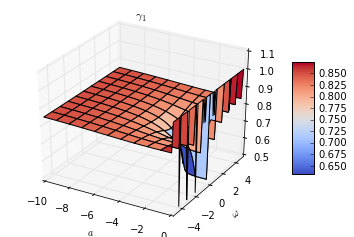

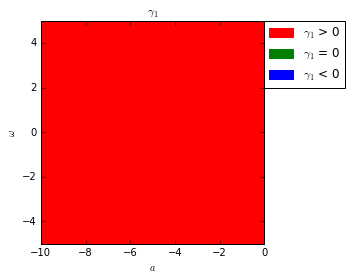

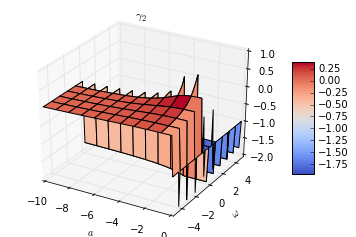

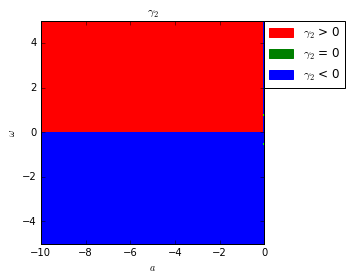

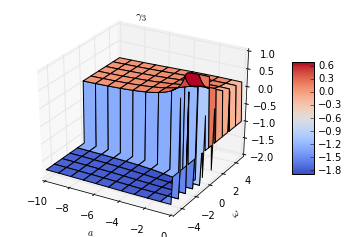

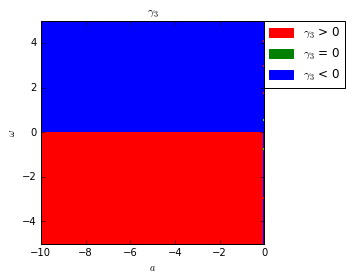

In [8]:
aaa = np.linspace(-10,0,100)

omegas = np.linspace(-5,5,100)

Aaa, Omegas = np.meshgrid(aaa,omegas)

Betas = getBeta(Aaa,1.,Omegas,1.)
cosBetas = np.cos(Betas)
sinBetas = np.sin(Betas)


plot3d(Aaa,Omegas,cosBetas,'$a$','$\omega$','$\gamma_1$')
plot3d(Aaa,Omegas,-(cosBetas+np.sqrt(3)*sinBetas),'$a$','$\omega$','$\gamma_2$')
plot3d(Aaa,Omegas,-(cosBetas-np.sqrt(3)*sinBetas),'$a$','$\omega$','$\gamma_3$')

### Conclusions

The above results indicate that, for $a<0$, only $\lambda_2$ has a negative real part. Let $\lambda$ be this solution. The Laplace transform of $u$ can be written as 

\begin{equation}
\hat{u}(x,\omega) = \alpha(\omega)e^{\lambda(\omega)x}
\end{equation}

which is solution of

\begin{equation}
\hat{u}_x = \lambda \hat{u}
\end{equation}

Therefore, from the inverse Laplace Transform

\begin{equation}
    \frac{\partial{u}}{{\partial x}}(x,t) = \int_{-\infty}^{\infty}\hat{u}_x(x,\omega)e^{i\omega t}d\omega
\end{equation}

we get the TBC for the boundary $x_0$

\begin{equation}
    \frac{\partial{u}}{{\partial x}}(x_0,t) = \int_{-\infty}^{\infty}\lambda \hat{u}(x_0,\omega)e^{i\omega t}d\omega
\end{equation}

## Generic case

We will analyze in a similar way the sign of the real part of the solutions of (\ref{eq:CharEq}) without restrictions for the value of $a$.

Considering that in the case $a>0$ is not so simple to obtain conclusions about these signs, as we did previously, we will now compute these solutions using (\ref{eq:lambdas}), and plot its real parts in function of $a$ and $\omega$

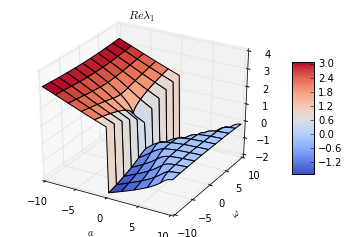

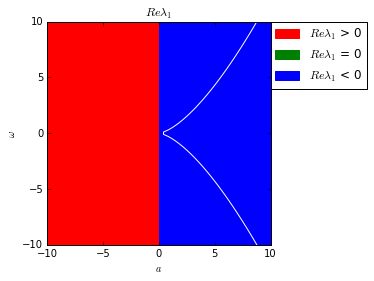

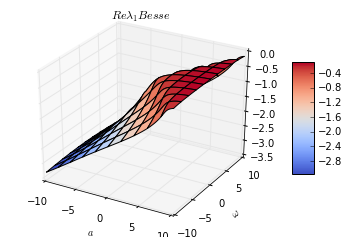

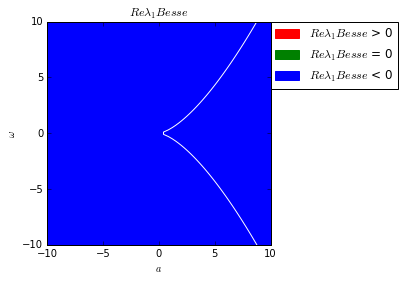

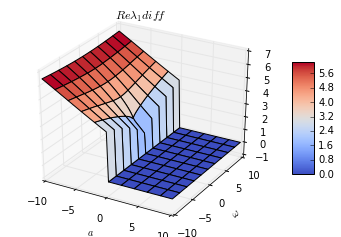

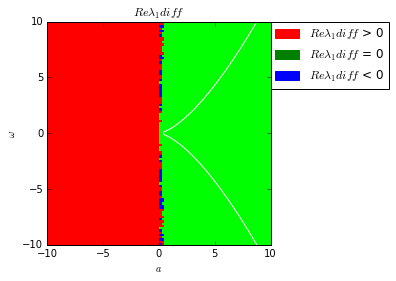

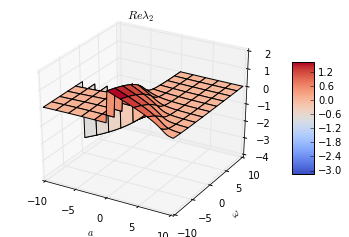

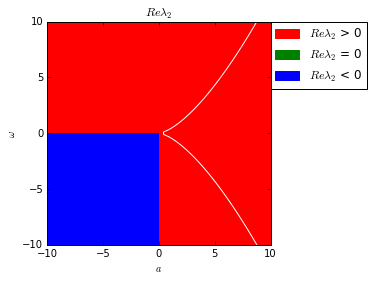

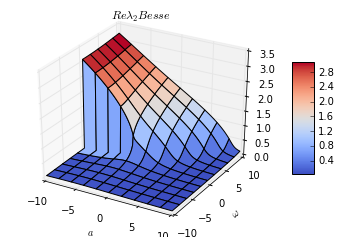

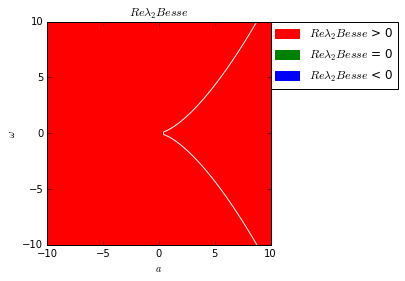

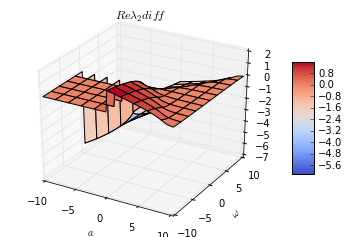

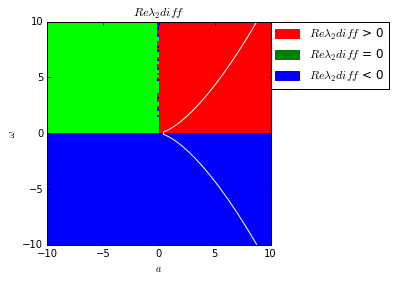

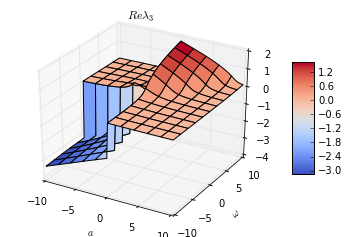

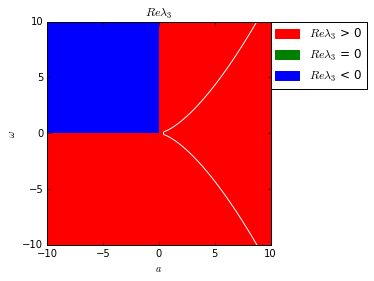

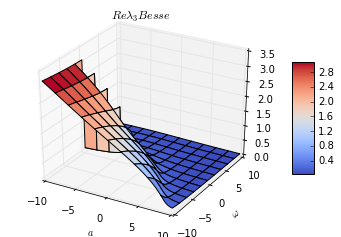

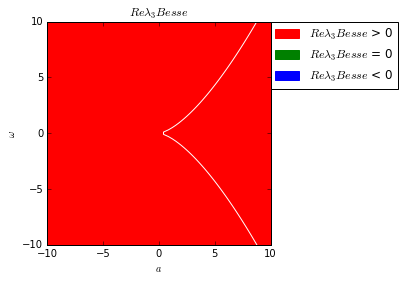

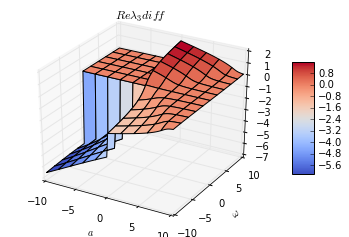

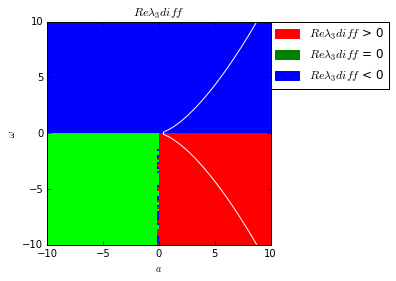

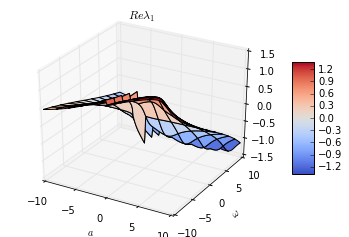

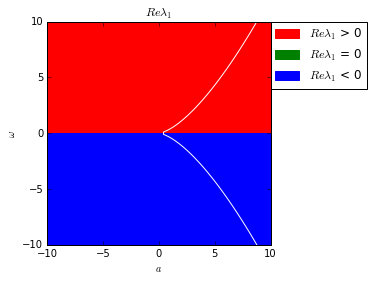

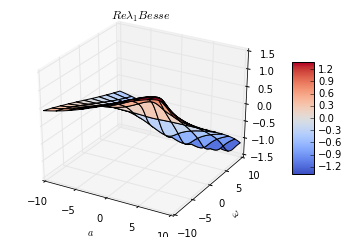

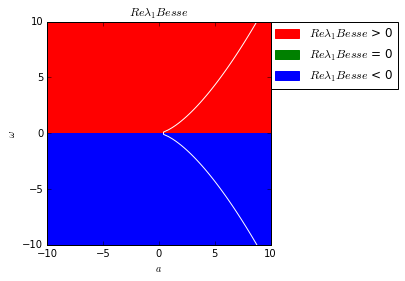

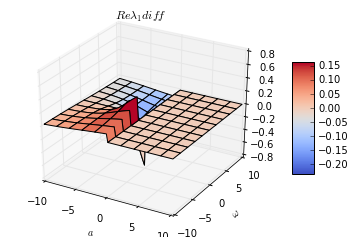

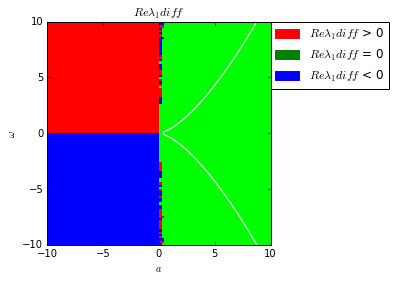

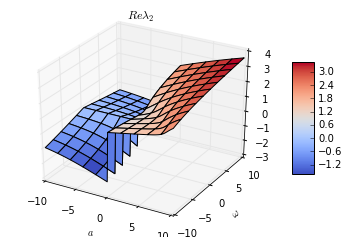

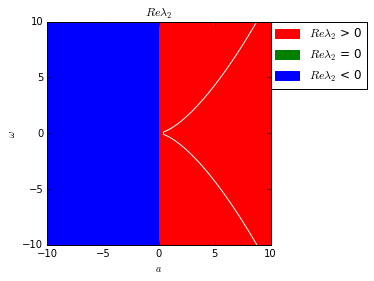

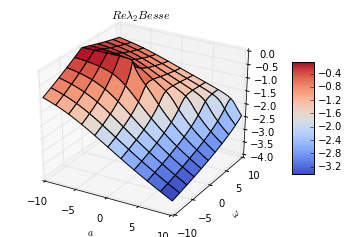

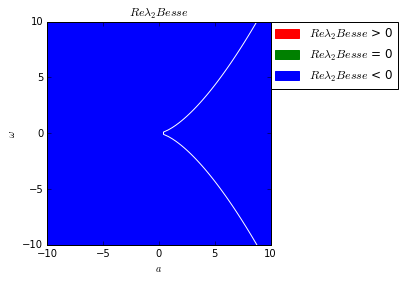

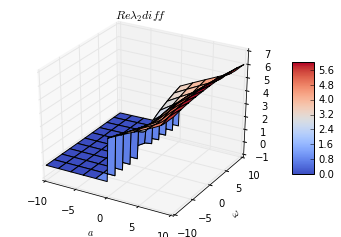

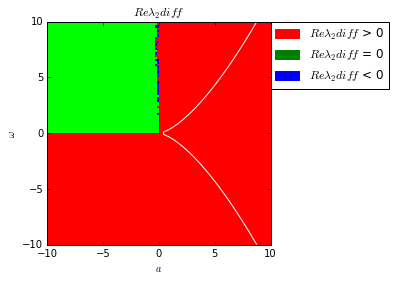

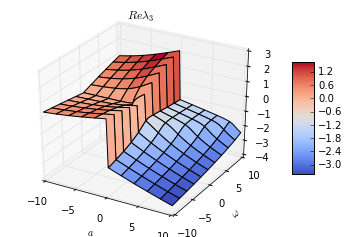

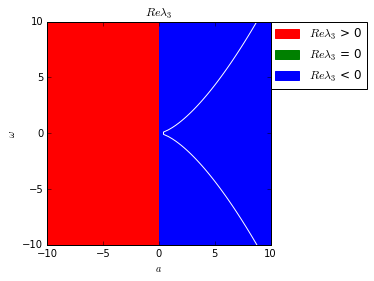

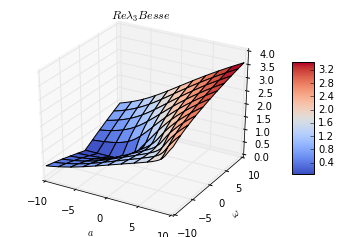

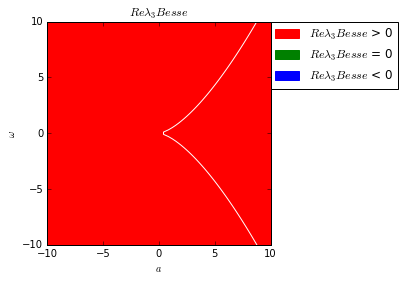

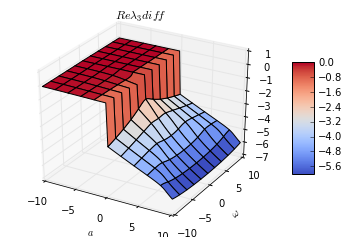

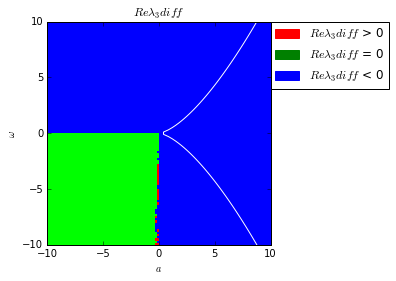

In [26]:
aaa = np.linspace(-10,10,100)

omegas = np.linspace(-10,10,100)

Aaa, Omegas = np.meshgrid(aaa,omegas)

eps = 1.
sigma = 1.
 
Lamb1b,Lamb2b,Lamb3b = getLambdasBesse(Aaa,sigma,Omegas,eps)
Lamb1,Lamb2,Lamb3 = getLambdas(Aaa,sigma,Omegas,eps)

plot3d(Aaa,Omegas,np.real(Lamb1),'$a$','$\omega$','$Re \lambda_1$')
plot3d(Aaa,Omegas,np.real(Lamb1b),'$a$','$\omega$','$Re \lambda_1 Besse$')
plot3d(Aaa,Omegas,np.real(Lamb1 - Lamb1b),'$a$','$\omega$','$Re \lambda_1 diff$')
plot3d(Aaa,Omegas,np.real(Lamb2),'$a$','$\omega$','$Re \lambda_2$')
plot3d(Aaa,Omegas,np.real(Lamb2b),'$a$','$\omega$','$Re \lambda_2 Besse$')
plot3d(Aaa,Omegas,np.real(Lamb2 - Lamb2b),'$a$','$\omega$','$Re \lambda_2 diff$')
plot3d(Aaa,Omegas,np.real(Lamb3),'$a$','$\omega$','$Re \lambda_3$')
plot3d(Aaa,Omegas,np.real(Lamb3b),'$a$','$\omega$','$Re \lambda_3 Besse$')
plot3d(Aaa,Omegas,np.real(Lamb3 - Lamb3b),'$a$','$\omega$','$Re \lambda_3 diff$')

plot3d(Aaa,Omegas,np.imag(Lamb1),'$a$','$\omega$','$Re \lambda_1$')
plot3d(Aaa,Omegas,np.imag(Lamb1b),'$a$','$\omega$','$Re \lambda_1 Besse$')
plot3d(Aaa,Omegas,np.imag(Lamb1 - Lamb1b),'$a$','$\omega$','$Re \lambda_1 diff$')
plot3d(Aaa,Omegas,np.imag(Lamb2),'$a$','$\omega$','$Re \lambda_2$')
plot3d(Aaa,Omegas,np.imag(Lamb2b),'$a$','$\omega$','$Re \lambda_2 Besse$')
plot3d(Aaa,Omegas,np.imag(Lamb2 - Lamb2b),'$a$','$\omega$','$Re \lambda_2 diff$')
plot3d(Aaa,Omegas,np.imag(Lamb3),'$a$','$\omega$','$Re \lambda_3$')
plot3d(Aaa,Omegas,np.imag(Lamb3b),'$a$','$\omega$','$Re \lambda_3 Besse$')
plot3d(Aaa,Omegas,np.imag(Lamb3 - Lamb3b),'$a$','$\omega$','$Re \lambda_3 diff$')

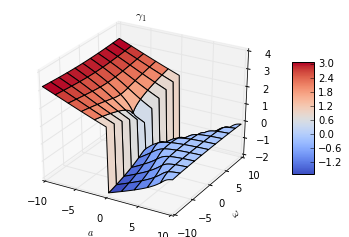

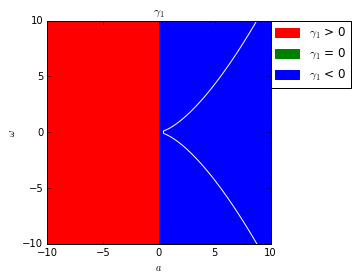

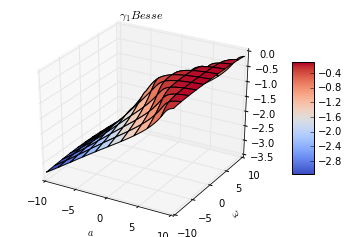

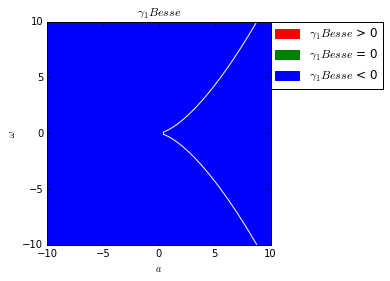

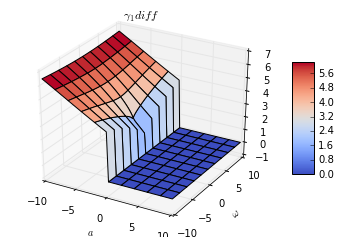

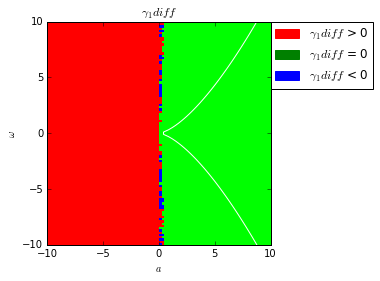

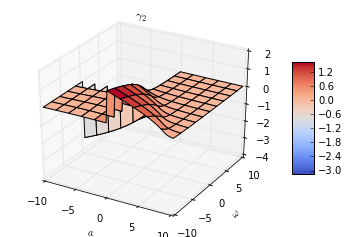

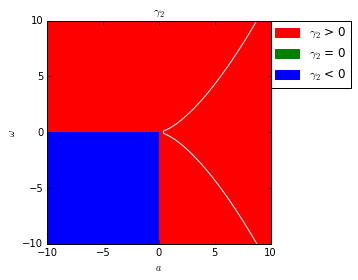

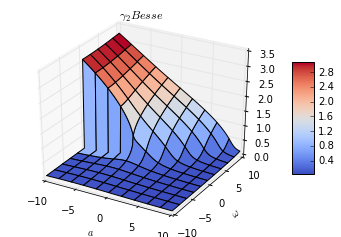

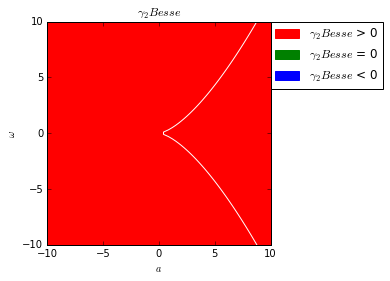

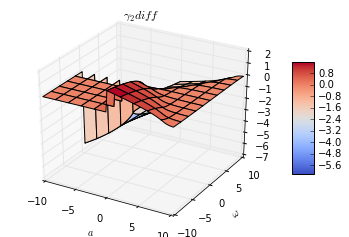

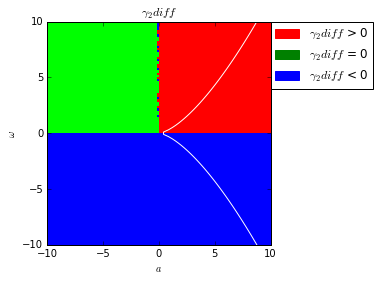

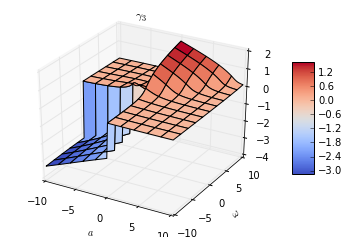

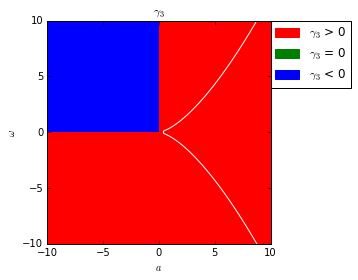

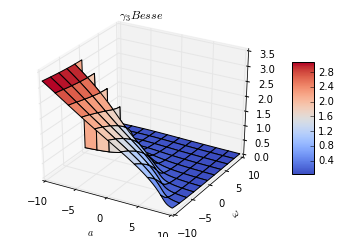

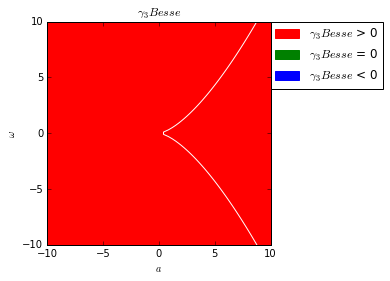

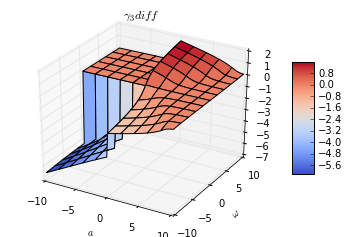

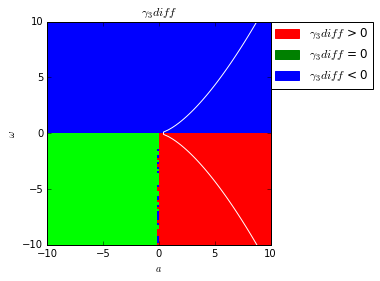

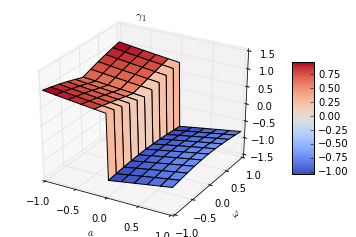

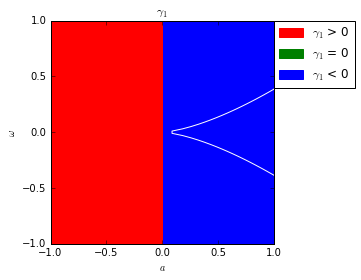

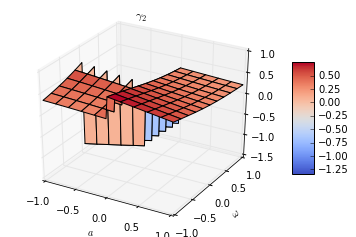

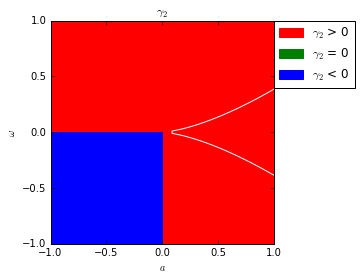

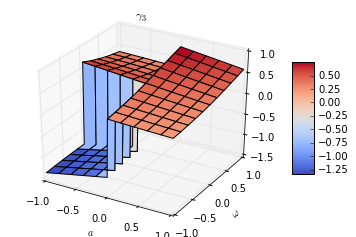

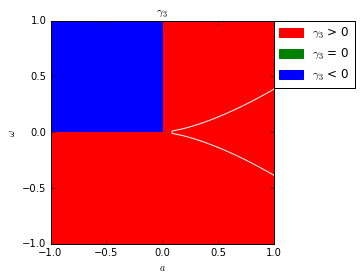

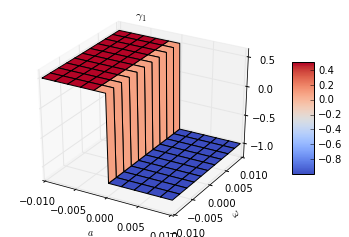

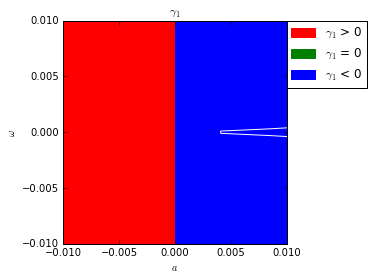

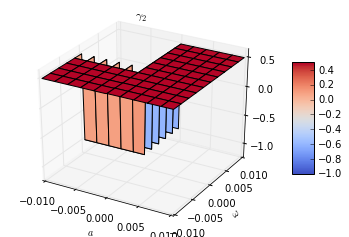

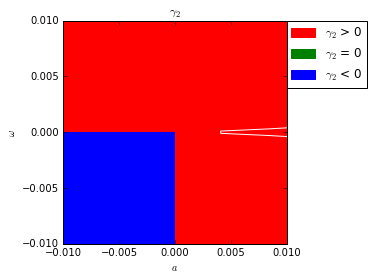

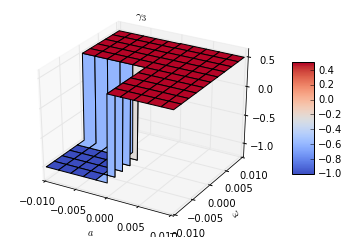

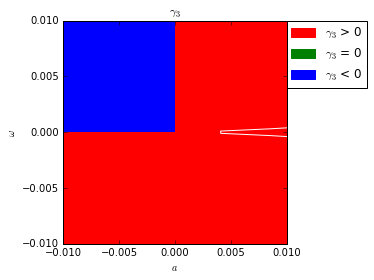

In [25]:
### MORE REFINED

aaa = np.linspace(-1,1,100)
omegas = np.linspace(-1,1,100)

Aaa, Omegas = np.meshgrid(aaa,omegas) 

Lamb1,Lamb2,Lamb3 = getLambdas(Aaa,sigma,Omegas,eps)

plot3d(Aaa,Omegas,np.real(Lamb1),'$a$','$\omega$','$\gamma_1$')
plot3d(Aaa,Omegas,np.real(Lamb2),'$a$','$\omega$','$\gamma_2$')
plot3d(Aaa,Omegas,np.real(Lamb3),'$a$','$\omega$','$\gamma_3$')


### YET MORE REFINED

aaa = np.linspace(-.01,.01,100)
omegas = np.linspace(-.01,.01,100)

Aaa, Omegas = np.meshgrid(aaa,omegas)

Lamb1,Lamb2,Lamb3 = getLambdas(Aaa,sigma,Omegas,eps)


plot3d(Aaa,Omegas,np.real(Lamb1),'$a$','$\omega$','$\gamma_1$')
plot3d(Aaa,Omegas,np.real(Lamb2),'$a$','$\omega$','$\gamma_2$')
plot3d(Aaa,Omegas,np.real(Lamb3),'$a$','$\omega$','$\gamma_3$')

### Conclusions

The last results show that different behaviors of $sgn(Re(\lambda_i))$ occur in well-defined regions of the $a-\omega$ plane. In fact, considering only positive values of $\omega$, only $\lambda_2$ has a negative real-part, which happens above the curve $4a^3 - 27\omega^2 = 0$. We notice that it coincides with the definition of $D^2$, so it limits the regions of the plane where $D$ is a real or a pure imaginary number.

These empirical analysis and results motivate us to prove and find analytical expressions for determining the solutions $\lambda_i$ that don't must vanish in (\ref{eq:solutionODEhat}) :

## Proof : choice of $\lambda_i$

$\newcommand{\D}{\sqrt{4a^3-27\omega^2}}$
$\newcommand{\Dn}{\sqrt{27\omega^2 - 4a^3}}$
$\newcommand{\DD}{4a^3-27\omega^2}$
$\newcommand{\DDT}{\sqrt{12a^3-81\omega^2}}$


We recall the definitions

\begin{equation}
D = \D\\
\theta = \sqrt[3]{D\sqrt{3}-9i\omega} = \rho e^{i\beta}\\
\tilde{\theta} = \theta^3 = D\sqrt{3}-9i\omega = \tilde{\rho} e^{i\tilde{\beta}}
\end{equation}

and the relations

\begin{equation}
\rho = \sqrt[3]{\tilde{\rho}}\\
\beta = \frac{1}{3}\tilde{\beta}
\end{equation}

We will consider separately the cases $a>0$ and $a<0$, and always $\omega>0$, and study the differents signs of $\DD$ : 

### Case $a>0$

#### Case $\DD > 0$

In this case, $D = \D \in \mathbb{R}$. Therefore,

$\tilde{\theta} = D\sqrt{3}-9i\omega = \DDT - 9i\omega \longrightarrow \tilde{\rho}^2 = \left(\DDT\right)^2 + 81\omega^2 = 12a^3 $

and

$\rho^2 - a\sqrt[3]{12} = \tilde{\rho}^\frac{2}{3} - a\sqrt[3]{12} = a\sqrt[3]{12} - a\sqrt[3]{12} = 0 $

Because of \ref{eq:realLambdas},

$Re(\lambda_i) = 0, \ \ i=1,2,3$

#### Case $\DD = 0$

In this case, we have

$D = 0 \longrightarrow \tilde{\theta} = -9i\omega \longrightarrow \rho^2 = (9\omega)^{\frac{2}{3}}$.

Therefore,

$\rho^2 - a\sqrt[3]{12} = (3\cdot27\omega^2)^{1/3} - (3\cdot4a^3)^{1/3} = \sqrt[3]{3}\left( (27\omega^2)^{1/3} - (4a^3)^{1/3} \right) = \sqrt[3]{3} \frac{27\omega^2 - 4a^3}{(27\omega^2)^{2/3} + (27\cdot4\omega^2a^3)^{1/3} + (4a^3)^{2/3}}  = 0$

because $(27\omega^2)^{2/3} + (27\cdot4\omega^2a^3)^{1/3} + (4a^3)^{2/3} > 0$.

For the same reason as the previous case, we conclude

$Re(\lambda_i) = 0, \ \ i=1,2,3$

#### Case $\DD < 0$

In this case, $D$ is a pure imaginary number : 

$D = i\Dn$.

Therefore,

\begin{equation}
\tilde{\theta} = \left( \sqrt{81\omega^2 - 12a^3} - 9\omega \right)i
\end{equation}

We have

$\tilde{\rho}^2 = \left( \sqrt{81\omega^2 - 12a^3} - 9\omega \right)^2 = \left( \frac{81\omega^2 - 12a^3 - 81\omega^2}{\sqrt{81\omega^2 - 12a^3} + 9\omega}\right)^2 = \left(\frac{12a^3}{\sqrt{81\omega^2 - 12a^3} + 9\omega}\right)^2 $

and

$\rho^2 - a\sqrt[3]{12} = \left(\frac{a\sqrt[3]{12}}{\sqrt{81\omega^2 - 12a^3} + 9\omega}\right)^2 - a\sqrt[3]{12} = a\sqrt[3]{12} \left( \frac{a\sqrt[3]{12} }{\left(\sqrt{81\omega^2 - 12a^3} + 9\omega\right)^2} - 1 \right)$

$......$


array([[ 3.80548401+0.4168537j ,  3.77795412+0.40995404j,
         3.75031826+0.40287978j, ..., -0.80466313-1.21164545j,
        -0.82088417-1.17175849j, -0.83375693-1.1351629j ],
       [ 3.80229714+0.42480237j,  3.77466062+0.41798154j,
         3.74691418+0.41098573j, ..., -0.81345891-1.17650088j,
        -0.82765388-1.13873795j, -0.83910545-1.10405067j],
       [ 3.79914398+0.43280225j,  3.77140078+0.42606263j,
         3.74354364+0.41914774j, ..., -0.82104882-1.14241576j,
        -0.83359011-1.10666005j, -0.84386082-1.07375285j],
       ..., 
       [ 3.79914398-0.43280225j,  3.77140078-0.42606263j,
         3.74354364-0.41914774j, ..., -0.82104882+1.14241576j,
        -0.83359011+1.10666005j, -0.84386082+1.07375285j],
       [ 3.80229714-0.42480237j,  3.77466062-0.41798154j,
         3.74691418-0.41098573j, ..., -0.81345891+1.17650088j,
        -0.82765388+1.13873795j, -0.83910545+1.10405067j],
       [ 3.80548401-0.4168537j ,  3.77795412-0.40995404j,
         3.75031826-0.4028797